In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sigproc_kit import *
from my_utils import *

big_figure()

In [3]:

t = np.arange(0,200e-9,10e-12)

In [4]:
def toggle_ff(y):
    return np.cumsum(rising_edge_detect(y)) % 2

def sequence_bits_on_clk(clk,input_string):
    bin_string = ''.join(char for char in input_string if char in ('0', '1'))
    index = np.cumsum(rising_edge_detect(clk)) - 1
    output = clk*0
    bin_string_length = len(bin_string)
    for i in range(len(clk)):
        output[i] = 0
        if index[i] >= 0 and index[i] < bin_string_length:
            output[i] = bin_string[int(index[i])] == "1"
    return output

def sample_bits_on_clk(clk,wfm):
    re = rising_edge_detect(clk)
    mask = re >= 0.5
    data = wfm[mask]
    output = ""
    for d in data:
        if d == 1:
            output += "1"
        else:
            output += "0"
    return output

def clock(t,f,**kwargs):
    phase = kwargs.get("phase",0)
    return 0.5*sqwave(2*np.pi*f*t + phase)+.5
    

In [5]:
def count_01(binstr):
    zeros = len(binstr.replace("1",""))
    ones  = len(binstr.replace("0",""))
    return [zeros, ones]
    

In [6]:
CMC8 =  ['10001110',
         '10011100',
         '10111000',
         '11000110',
         '11001100',
         '11011000',
         '11100010',
         '11100100',
         '11101000']

idle_sym = [CMC8[2],CMC8[6]]
idle_sym

['10111000', '11100010']

In [7]:
idle_seq = idle_sym * 1000
idle_str = "".join(idle_seq)

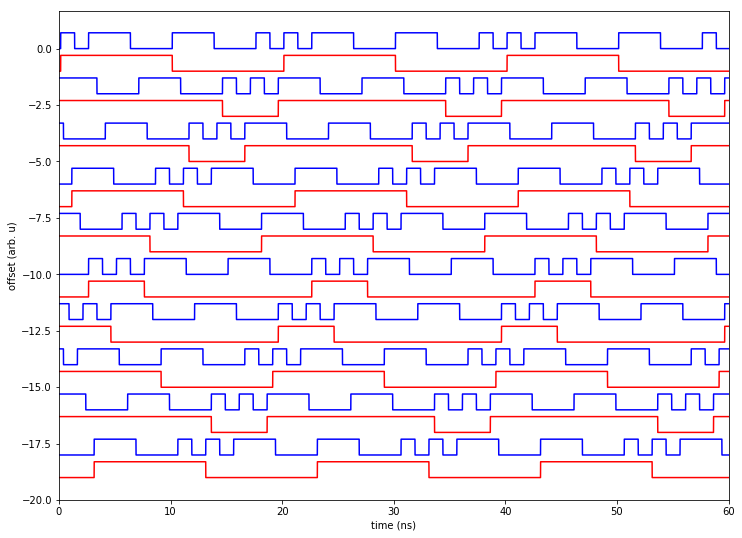

In [20]:
big_figure()
c800 = clock(t,800e6,phase=-0.25*np.pi)
data = sequence_bits_on_clk(c800,idle_str)
#tff1a = toggle_ff(data)
#tff2a = toggle_ff(tff1a)
c=0

# plt.plot(t*1e9,0.8*c800     , label = "c800"); c += 1
# plt.plot(t*1e9,0.8*data  - c, label = "data"); c += 1
# plt.plot(t*1e9,0.8*tff2a - c, label = "tff2a"); c += 1

for shift in np.arange(0,30e-9,3e-9):

    dummy, data_shift = shift_time(t,data,-1*shift)
    tff1b = toggle_ff(data_shift)
    tff2b = toggle_ff(tff1b)

    plt.plot(t*1e9,0.7*data_shift  - c, label = "data_shift", c="blue"); c += 1
    #plt.plot(t*1e9,0.8*tff1a - c, label = "tff1a"); c += 1
    #plt.plot(t*1e9,0.8*tff1b - c, label = "tff1b"); c += 1
    #plt.plot(t*1e9,0.8*tff2a - c, label = "tff2a"); c += 1
    plt.plot(t*1e9,0.7*tff2b - c, label = "tff2b sh {:3.3f}ns".format(shift*1e9),c="red"); c += 1
plt.xlim(0,60)
plt.xlabel("time (ns)")
plt.ylabel("offset (arb. u)")
#plt.legend()
plt.show()